In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,7.4,2.8,6.1,1.9,Iris-virginica
88,5.6,3.0,4.1,1.3,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
81,5.5,2.4,3.7,1.0,Iris-versicolor


In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# no null value found

In [6]:
# checking duplicate value

In [7]:
df.duplicated().sum()

3

In [8]:
# 3 duplicate value found

In [9]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
# conforming and check which values are duplicate.

In [11]:
df[(df["SepalLengthCm"]==4.9)&(df["SepalWidthCm"]==3.1)&(df["PetalLengthCm"]==1.5)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
df[(df["SepalLengthCm"]==5.8)&(df["SepalWidthCm"]==2.7)&(df["PetalLengthCm"]==5.1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
# removing the duplicate values.

In [14]:
dup_index=df[df.duplicated()].index

In [15]:
df.drop(index=dup_index,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [17]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df["Species"].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [19]:
# number of all species are almost equal so it is a balance dataset.

In [20]:
# checking outliers

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

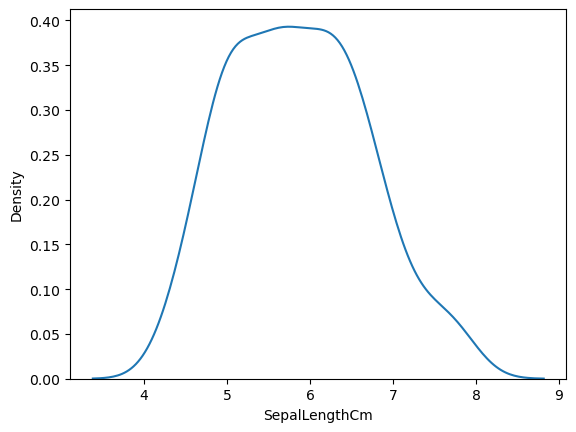

In [21]:
sns.kdeplot(df["SepalLengthCm"])

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

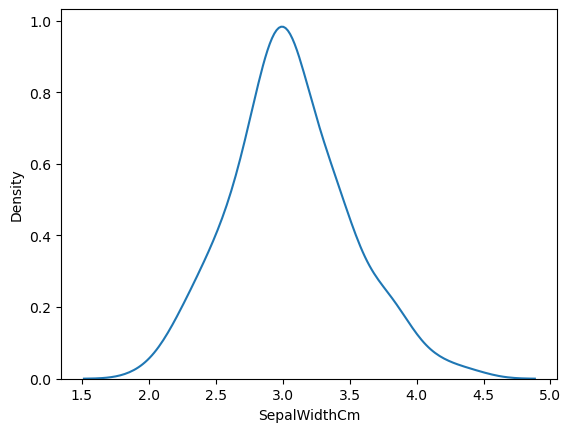

In [22]:
sns.kdeplot(df["SepalWidthCm"])

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

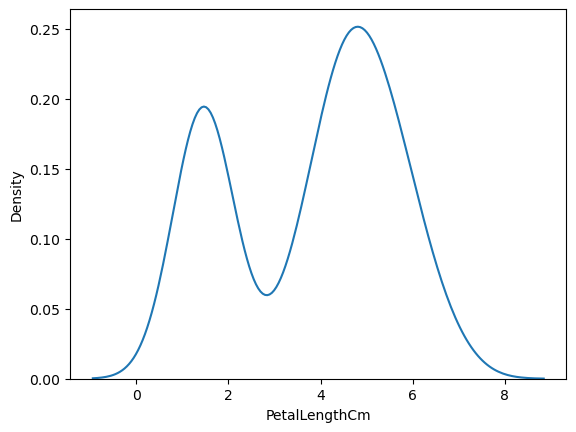

In [23]:
sns.kdeplot(df["PetalLengthCm"])

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

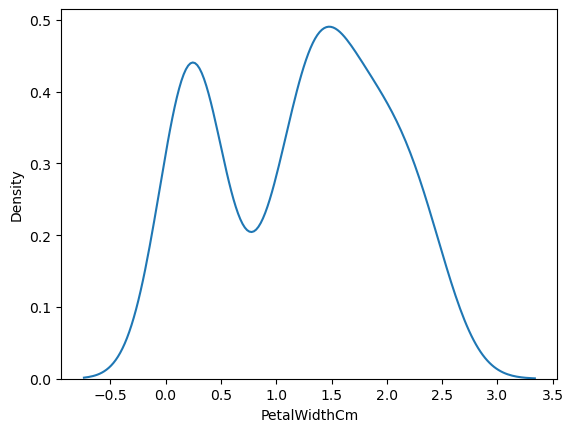

In [24]:
sns.kdeplot(df["PetalWidthCm"])

In [25]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
Q1=df["SepalLengthCm"].quantile(0.25)

In [27]:
Q1

5.1

In [28]:
Q3=df["SepalLengthCm"].quantile(0.75)

In [29]:
iqr=Q3-Q1

In [30]:
iqr

1.3000000000000007

In [31]:
Q1-(1.5*iqr)

3.1499999999999986

In [32]:
Q3+(1.5* iqr)

8.350000000000001

In [33]:
df[(df["SepalLengthCm"]>4.35) | (df["SepalLengthCm"]<3.1)].index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       139, 140, 141, 143, 144, 145, 146, 147, 148, 149],
      dtype='int64', length=146)

In [34]:
def outlier_remover(df,list_col,Q1_per=0.25,Q3_per=0.75):
    """ df=DataFrame,
        col=Column_name,
        Q1_per=which value you want to make as Q1,
        Q3_per=which value you want to make as Q3 """
    l=list_col
    for i in list_col:
        Q1=df[i].quantile(Q1_per)
        Q3=df[i].quantile(Q3_per)
        iqr=Q3-Q1
        low_limit=Q1-(1.5 * iqr)
        upp_limit=Q3+(1.5 * iqr)
        out_index=df[(df[i]<low_limit)|(df[i]>upp_limit)].index
        df=df.drop(index=out_index)
    return df

In [35]:
df=outlier_remover(df,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

In [36]:
x=df.iloc[:,:4]

In [37]:
y=df.iloc[:,-1]

In [52]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=95)

In [82]:
from sklearn.preprocessing import LabelEncoder

In [84]:
Le=LabelEncoder()

In [90]:
y_train=Le.fit_transform(y_train)

In [94]:
y_test=Le.transform(y_test)

In [576]:
from sklearn.preprocessing import StandardScaler

In [578]:
sc=StandardScaler()

In [606]:
x_train_scaled=sc.fit_transform(x_train)

In [631]:
x_test_scaled=sc.transform(x_test)

In [635]:
x_train_scaled=pd.DataFrame(data=x_train_scaled,columns=x_train.columns)

In [637]:
x_test_scaled=pd.DataFrame(data=x_test_scaled,columns=x_train.columns)

In [114]:
from sklearn.linear_model import LogisticRegression

In [116]:
from sklearn.model_selection import GridSearchCV

In [179]:
from sklearn.model_selection import cross_val_score

In [614]:
def train_model(model,model_name,parameters,cv=10,x_train=None,y_train=None,x_test=x_test,y_test=y_test):
    m=model
    param_grid=parameters
    scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
    }
    grid=GridSearchCV(estimator=m,param_grid=param_grid,scoring=scoring,refit='accuracy',n_jobs=-1,cv=5,error_score='raise')
    grid.fit(x_train,y_train)
    bst_para=grid.best_params_
    print(bst_para)
    m=model_name(**bst_para)
    x=cross_val_score(estimator=m,X=x_train,y=y_train,cv=cv,n_jobs=-1)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    print("Accuracy_score = {} , Recall_score= {}, precision_score={} , f1_score={}, cross_val_score={}".format(accuracy_score(y_test,y_pred),recall_score(y_test,y_pred,average='macro'),precision_score(y_test, y_pred,average='macro'),f1_score(y_test,y_pred,average='macro'),np.round(np.mean(x),2)))
    print("Confusion_metrix = ",confusion_matrix(y_test,y_pred))
    return m

# 1. LogisticRegression

In [665]:
parameter_Lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga', 'lbfgs', 'newton-cg'],
    'penalty': ['l2']
}

In [661]:
Lr=LogisticRegression(max_iter=2000)

In [667]:
Lr=train_model(Lr,LogisticRegression,parameters=parameter_Lr,cv=5,x_train=x_train_scaled,y_train=y_train,x_test=x_test_scaled,y_test=y_test)

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Accuracy_score = 1.0 , Recall_score= 1.0, precision_score=1.0 , f1_score=1.0, cross_val_score=0.97
Confusion_metrix =  [[ 7  0  0]
 [ 0 10  0]
 [ 0  0 12]]


C:\Users\maury\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 2. SVC

In [669]:
parameters_svc={
    "C":[0.001,0.01,0.1,0.5,1,1.5],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    #"degree ":[2,3,4], degree are only used for 'poly' kernel we have to try this also for poly.
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [671]:
svc=SVC()

In [673]:
svc=train_model(svc,SVC,parameters=parameters_svc,cv=5,x_train=x_train_scaled,y_train=y_train,x_test=x_test_scaled,y_test=y_test)

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Accuracy_score = 0.9655172413793104 , Recall_score= 0.9722222222222222, precision_score=0.9696969696969697 , f1_score=0.9696342305037957, cross_val_score=0.96
Confusion_metrix =  [[ 7  0  0]
 [ 0 10  0]
 [ 0  1 11]]


# KNeighborsClassifier

In [675]:
from sklearn.neighbors import  KNeighborsClassifier

In [677]:
parameters_knn= {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [679]:
knn=KNeighborsClassifier()

In [681]:
knn=train_model(knn,KNeighborsClassifier,parameters=parameters_knn,cv=20,x_train=x_train_scaled,y_train=y_train,x_test=x_test_scaled,y_test=y_test)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy_score = 0.9655172413793104 , Recall_score= 0.9722222222222222, precision_score=0.9696969696969697 , f1_score=0.9696342305037957, cross_val_score=0.97
Confusion_metrix =  [[ 7  0  0]
 [ 0 10  0]
 [ 0  1 11]]


# GaussianNB

In [683]:
from sklearn.naive_bayes import GaussianNB

In [685]:
parameters_gnb={'var_smoothing': [1e-9, 1e-8, 1e-7]}

In [687]:
gnn=GaussianNB()

In [689]:
gnn=train_model(gnn,GaussianNB,parameters=parameters_gnb,cv=20,x_train=x_train_scaled,y_train=y_train,x_test=x_test_scaled,y_test=y_test)

{'var_smoothing': 1e-09}
Accuracy_score = 0.9655172413793104 , Recall_score= 0.9722222222222222, precision_score=0.9696969696969697 , f1_score=0.9696342305037957, cross_val_score=0.96
Confusion_metrix =  [[ 7  0  0]
 [ 0 10  0]
 [ 0  1 11]]


# DecisionTreeClassifier

In [691]:
from sklearn.tree import  DecisionTreeClassifier

In [693]:
parameters_dtc={
    'criterion' : ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"],
    'max_depth'  : [2,3,4],
    'min_samples_split' : [2,3],
    'min_samples_leaf' : [1,2,3]
}

In [695]:
dtc=DecisionTreeClassifier()

In [697]:
dtc=train_model(dtc,DecisionTreeClassifier,parameters=parameters_dtc,x_train=x_train_scaled,y_train=y_train,x_test=x_test_scaled,y_test=y_test)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}
Accuracy_score = 0.8620689655172413 , Recall_score= 0.8777777777777778, precision_score=0.8777777777777778 , f1_score=0.8777777777777778, cross_val_score=0.93
Confusion_metrix =  [[ 7  0  0]
 [ 0  8  2]
 [ 0  2 10]]


# Random Forest Classifier

In [518]:
from sklearn.ensemble import RandomForestClassifier

In [520]:
rfc=RandomForestClassifier()

In [707]:
parameters_rfc={
    "n_estimators":[200,500,1000],
    "criterion": ["gini", "entropy", "log_loss"],
    "oob_score":[True],
    "n_jobs":[-1]
}

In [709]:
train_model(rfc,RandomForestClassifier,parameters=parameters_rfc,x_train=x_train_scaled,y_train=y_train,x_test=x_test_scaled,y_test=y_test)

{'criterion': 'gini', 'n_estimators': 500, 'n_jobs': -1, 'oob_score': True}
Accuracy_score = 1.0 , Recall_score= 1.0, precision_score=1.0 , f1_score=1.0, cross_val_score=0.94
Confusion_metrix =  [[ 7  0  0]
 [ 0 10  0]
 [ 0  0 12]]


RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True)